# Stock Market Analysis 📈 + Prediction using LSTM

# Introducción
Este código obtiene los datos históricos de las acciones de varias empresas, los combina en un único dataframe y muestra las últimas filas de dicho dataframe. Esto permite analizar y visualizar los datos de las acciones de las empresas Nike, Adidas, Puma y Under Armour en un período de tiempo específico.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
consult_list = ['NKE', 'ADDYY', 'PUMSY', 'UA']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in consult_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [NKE, ADDYY, PUMSY, UA]
company_name = ["Nike", "Adidas", "Puma", "Under Armour"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

C:\Users\jaime\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-23,6.78,6.9850,6.74,6.81,6.81,3998628,Under Armour
2023-05-24,6.82,6.8650,6.47,6.55,6.55,4188063,Under Armour
2023-05-25,6.59,6.6100,6.42,6.47,6.47,2310085,Under Armour
2023-05-26,6.50,6.5800,6.46,6.51,6.51,2452681,Under Armour
2023-05-30,6.59,6.7000,6.47,6.69,6.69,3791878,Under Armour
2023-05-31,6.61,6.6300,6.43,6.58,6.58,4730863,Under Armour
2023-06-01,6.60,6.8300,6.50,6.71,6.71,4618625,Under Armour
2023-06-02,6.88,7.1300,6.80,7.12,7.12,3846401,Under Armour
2023-06-05,7.05,7.0699,6.80,6.88,6.88,3113928,Under Armour


In [2]:
# Summary Stats
NKE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,111.925952,113.332778,110.647024,112.035614,111.209525,7.376812e+06
std,11.317526,11.166848,11.360338,11.379681,11.484832,4.529743e+06
min,83.129997,86.199997,82.220001,83.120003,82.358948,3.426100e+06
25%,105.430002,106.880001,104.530001,105.335001,104.514212,5.096375e+06
50%,112.775002,113.805000,111.230000,112.614998,111.534832,6.174650e+06
75%,121.107498,122.414997,119.682499,121.002501,120.477455,8.321400e+06
max,130.449997,131.309998,127.860001,129.500000,128.708130,4.817610e+07


In [3]:
# General info
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-06 to 2023-06-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


# Precio de cierre
El precio de cierre es el último precio al que se negocian las acciones durante el día normal de negociación. El precio de cierre de una acción es la referencia estándar que utilizan los inversores para seguir su evolución a lo largo del tiempo.

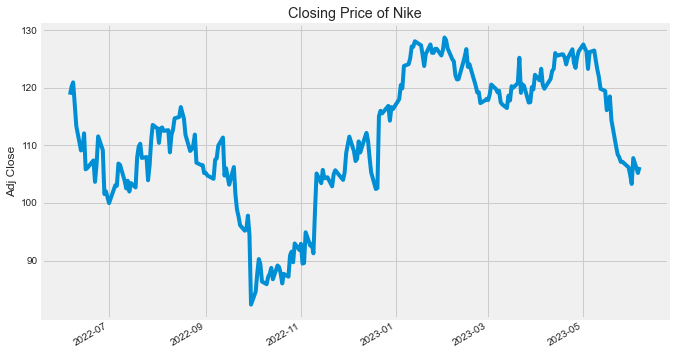

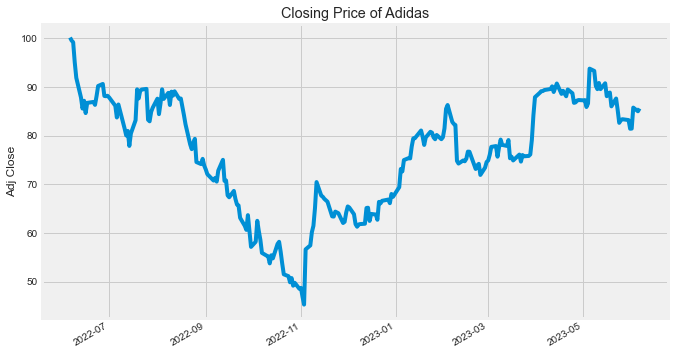

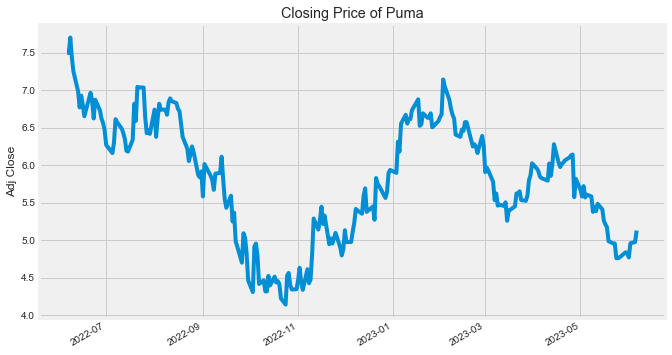

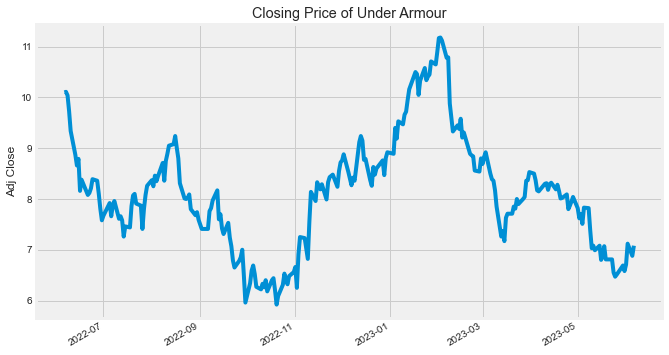

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
NKE['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Nike")

plt.show()

plt.figure(figsize=(10, 6))
ADDYY['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Adidas")

plt.show()

plt.figure(figsize=(10, 6))
PUMSY['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Puma")

plt.show()

plt.figure(figsize=(10, 6))
UA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Under Armour")

plt.show()

# Volumen de ventas
El volumen es la cantidad de un activo o valor que cambia de manos durante un cierto periodo de tiempo, a menudo en el transcurso de un día. Por ejemplo, el volumen de negociación de acciones se refiere al número de acciones de un valor negociadas entre la apertura y el cierre diarios. El volumen de negociación y sus variaciones a lo largo del tiempo son datos importantes para los operadores técnicos.

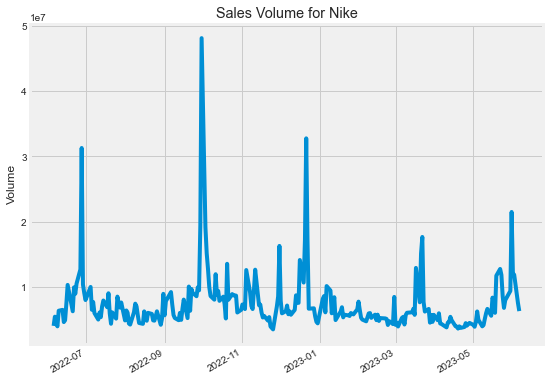

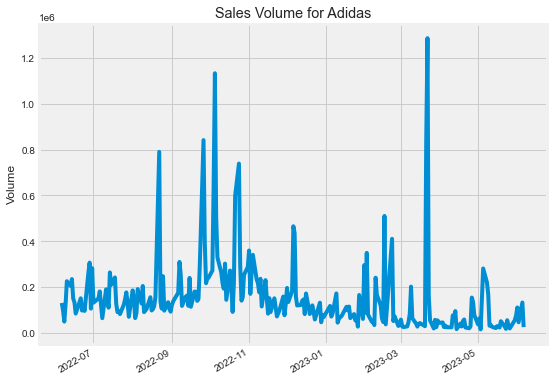

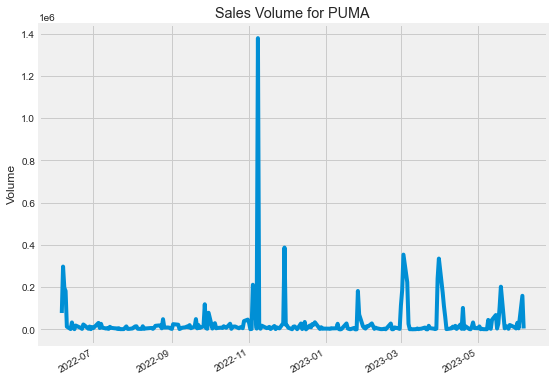

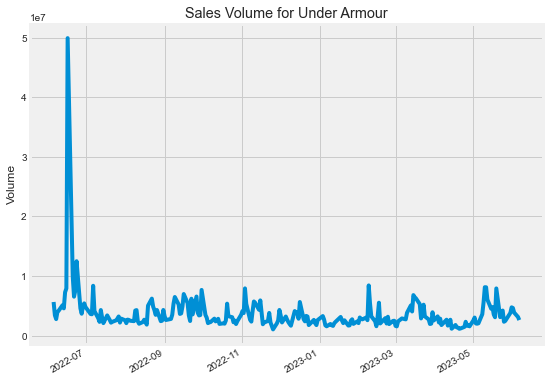

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
NKE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Nike")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
ADDYY['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Adidas")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
PUMSY['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for PUMA")
    
plt.tight_layout()


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.subplot(2, 2, 1)
UA['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Under Armour")
    
plt.tight_layout()

# 2. ¿Cuál era la media móvil de las distintas acciones?
La media móvil (MA) es una sencilla herramienta de análisis técnico que suaviza los datos de precios creando un precio medio actualizado constantemente. La media se toma a lo largo de un periodo de tiempo específico, como 10 días, 20 minutos, 30 semanas o cualquier periodo de tiempo que elija el operador.

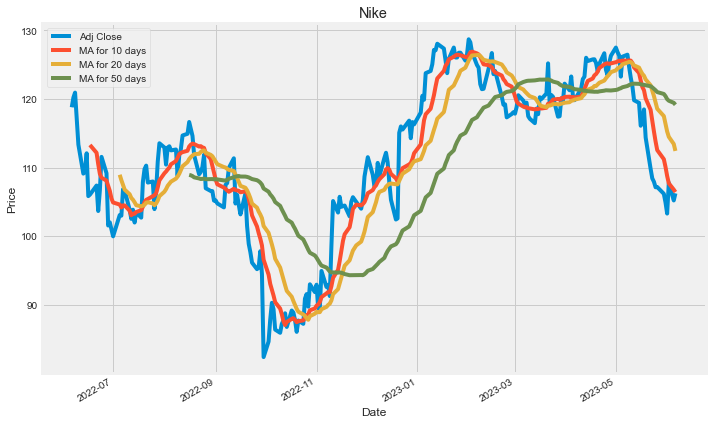

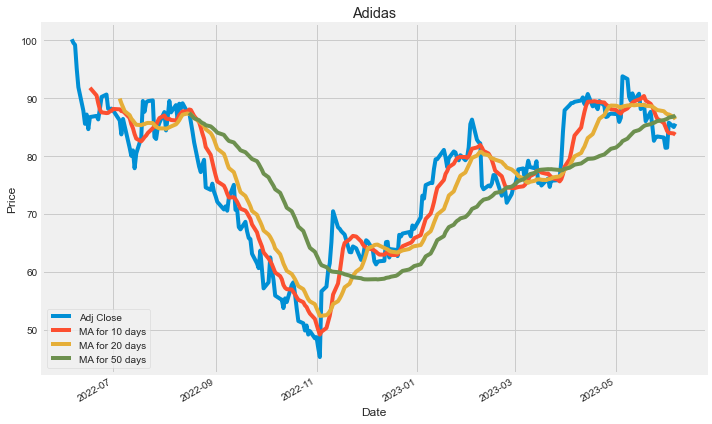

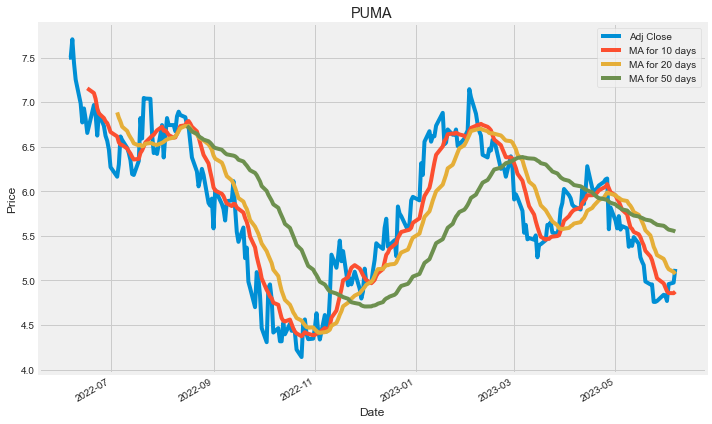

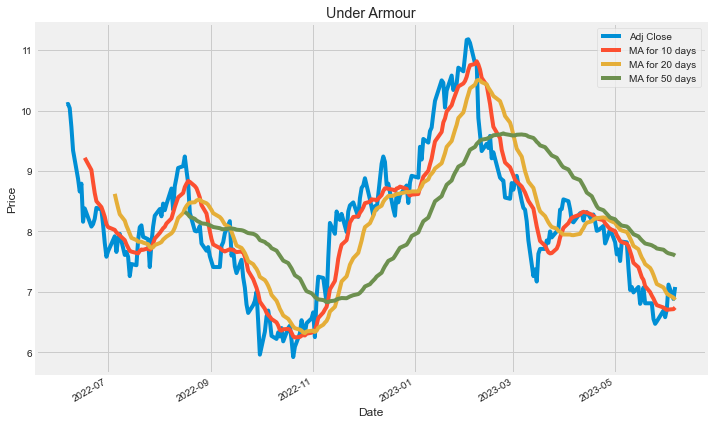

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    NKE[f"MA for {ma} days"] = NKE['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

NKE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Nike')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    ADDYY[f"MA for {ma} days"] = ADDYY['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ADDYY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Adidas')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    PUMSY[f"MA for {ma} days"] = PUMSY['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

PUMSY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('PUMA')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

for ma in ma_day:
    UA[f"MA for {ma} days"] = UA['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

UA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Under Armour')
axes.set_ylabel('Price')

fig.tight_layout()
plt.show()

# 3. ¿Cuál fue la rentabilidad diaria media de la acción?
Ahora que ya hemos hecho un análisis de referencia, vamos a profundizar un poco más. Ahora vamos a analizar el riesgo de la acción. Para ello tendremos que fijarnos más en los cambios diarios de la acción, y no sólo en su valor absoluto. Vamos a utilizar pandas para recuperar los rendimientos diarios de las acciones de Nike.

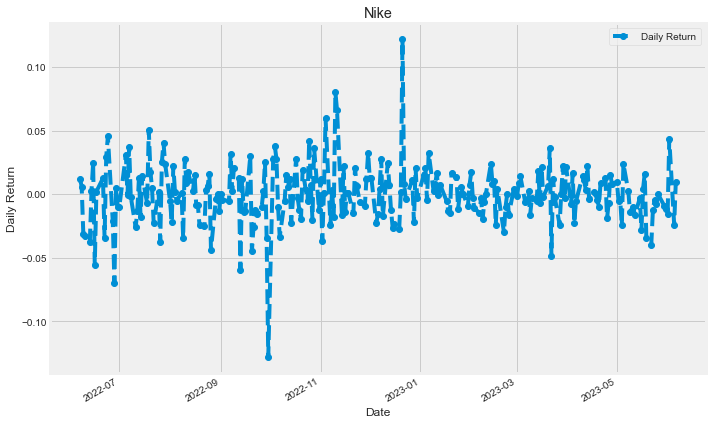

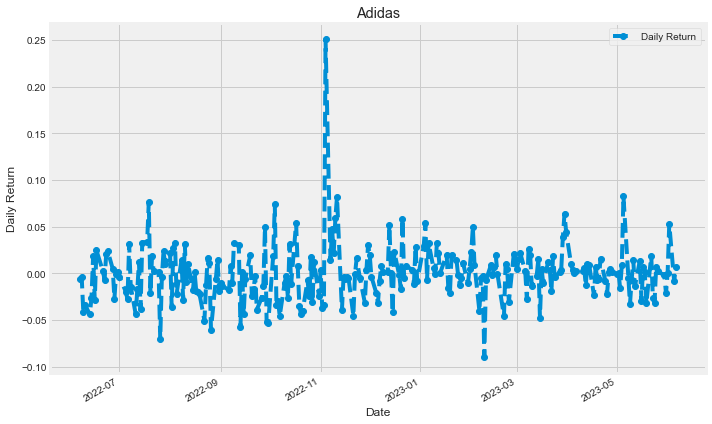

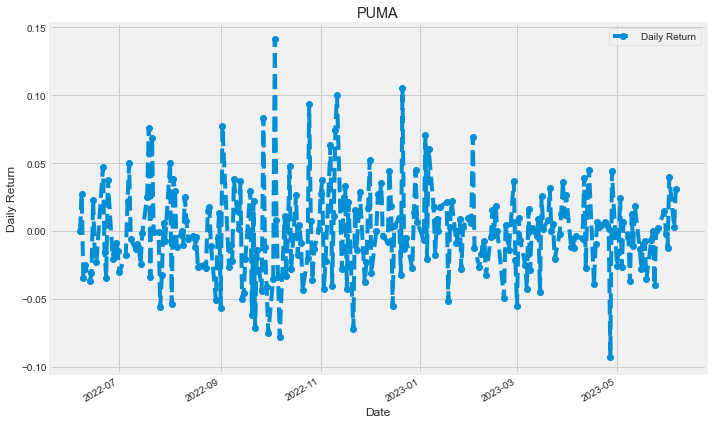

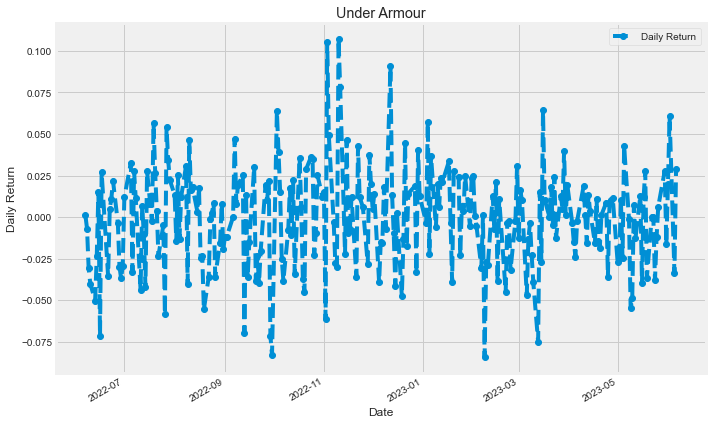

In [7]:
# We'll use pct_change to find the percent change for each day
# NIKE
NKE['Daily Return'] = NKE['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

NKE['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Nike')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
# Adidas
ADDYY['Daily Return'] = ADDYY['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ADDYY['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Adidas')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
# Puma
PUMSY['Daily Return'] = PUMSY['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

PUMSY['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('PUMA')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()

# We'll use pct_change to find the percent change for each day
# Under Armour
UA['Daily Return'] = UA['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

UA['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Under Armour')
axes.set_ylabel('Daily Return')

fig.tight_layout()
plt.show()


Genial, ahora echemos un vistazo general a la rentabilidad media diaria utilizando un histograma. Utilizaremos seaborn para crear un histograma y un gráfico kde en la misma figura.

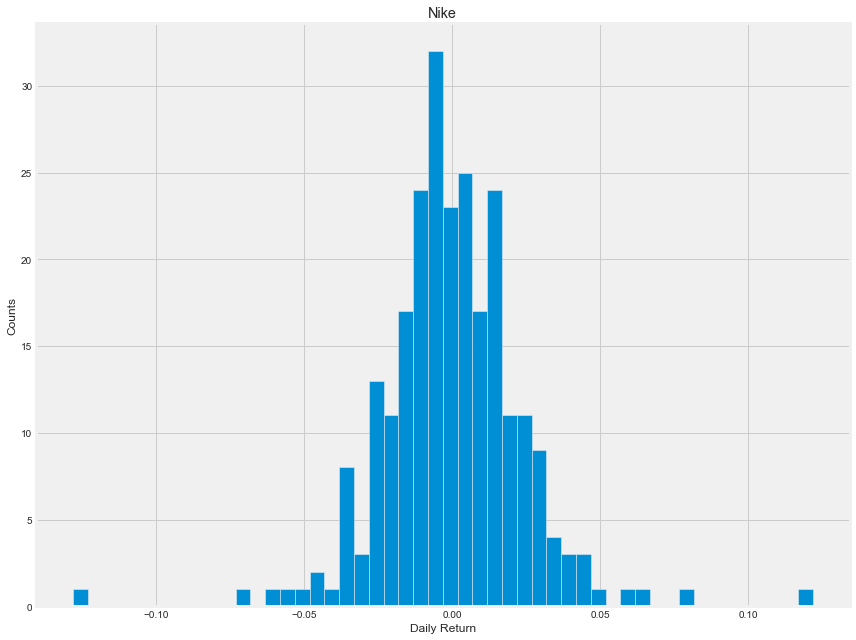

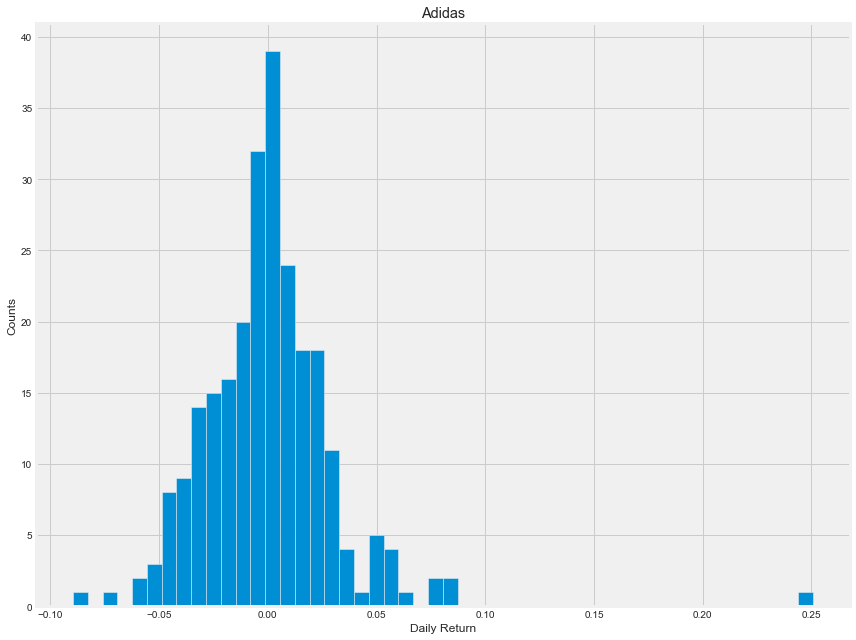

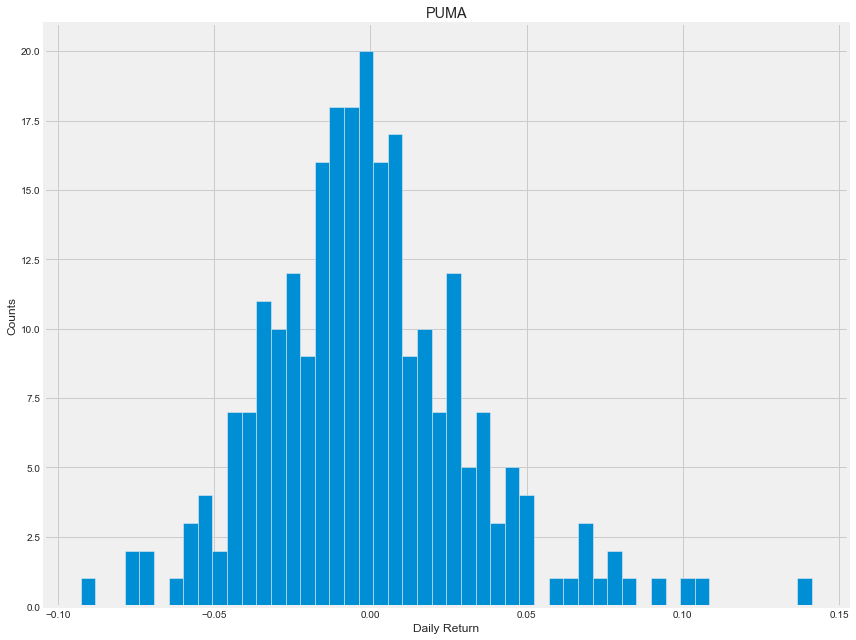

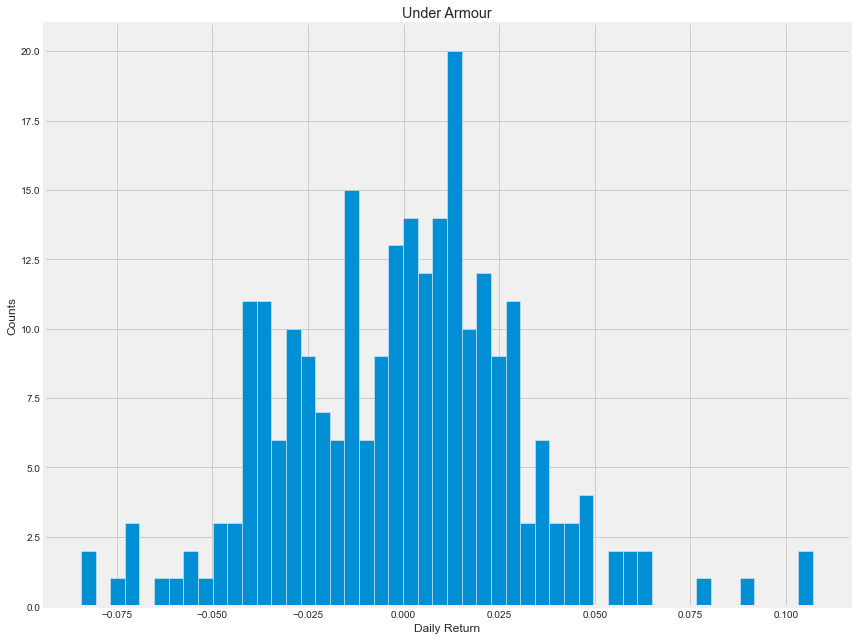

In [8]:
plt.figure(figsize=(12, 9))

NKE['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Nike')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

ADDYY['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Adidas')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

PUMSY['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('PUMA')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

UA['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('Under Armour')

plt.tight_layout()
plt.show()

# 4. ¿Cuál es la correlación entre los precios de cierre de las distintas acciones?
La correlación es una estadística que mide el grado en que dos variables se mueven entre sí y que tiene un valor que debe situarse entre -1,0 y +1,0. La correlación mide la asociación, pero no muestra si x causa y o viceversa, o si la asociación está causada por un tercer factor[1].


¿Y si quisiéramos analizar los rendimientos de todas las acciones de nuestra lista? Vamos a construir un DataFrame con todas las columnas ['Close'] para cada uno de los dataframes de las acciones.

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(consult_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,ADDYY,NKE,PUMSY,UA
Date,,,,
2022-06-06,NaN,NaN,NaN,NaN
2022-06-07,-0.006162,0.011977,0.000000,0.000990
2022-06-08,-0.003500,0.006000,0.027487,-0.006924
2022-06-09,-0.041345,-0.031046,-0.034395,-0.030877
2022-06-10,-0.033707,-0.032631,-0.025066,-0.040082


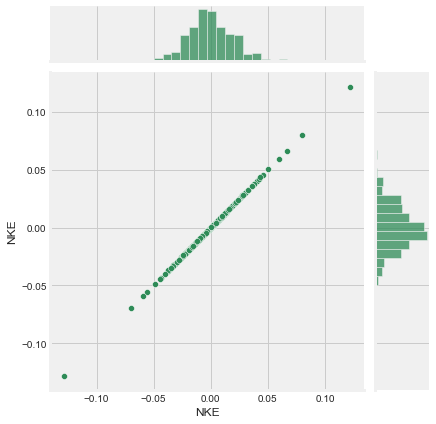

In [10]:
# Comparing Nike to itself should show a perfectly linear relationship
sns.jointplot(x='NKE', y='NKE', data=tech_rets, kind='scatter', color='seagreen')

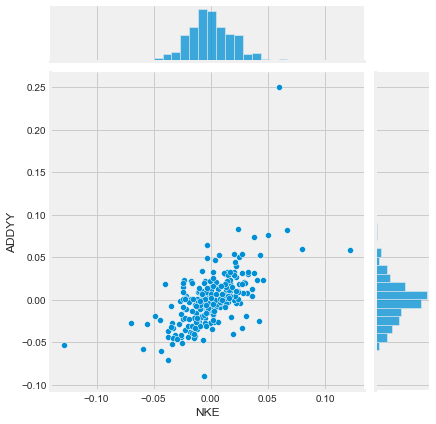

In [11]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='NKE', y='ADDYY', data=tech_rets, kind='scatter')

Así que ahora podemos ver que si dos acciones están perfectamente (y positivamente) correlacionadas entre sí, debería producirse una relación lineal entre sus valores de rentabilidad diaria.

Seaborn y pandas hacen que sea muy fácil repetir este análisis de comparación para cada combinación posible de valores en nuestra lista de valores tecnológicos. Podemos utilizar sns.pairplot() para crear automáticamente este gráfico

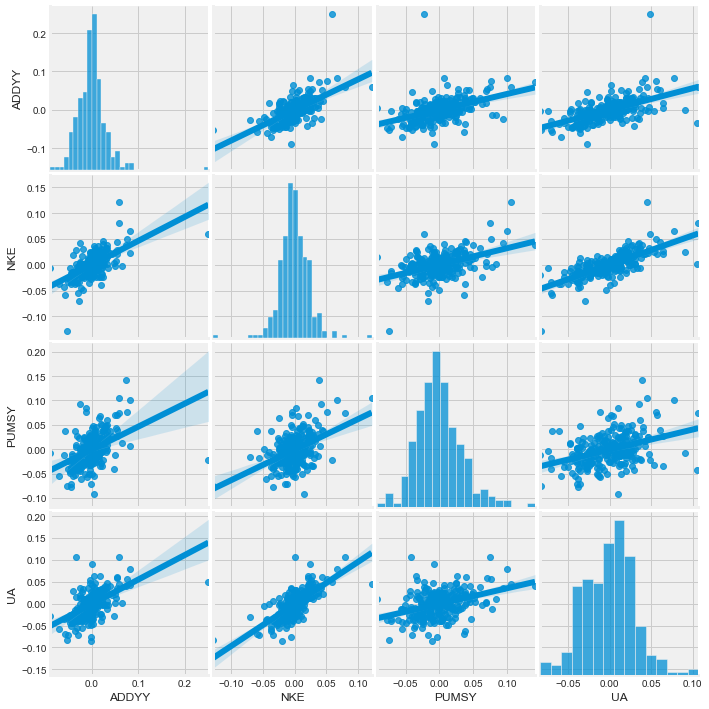

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


Arriba podemos ver todas las relaciones en los rendimientos diarios entre todas las acciones. Un rápido vistazo muestra una interesante correlación entre los rendimientos diarios de Nike y Adidas. Podría ser interesante investigar esa comparación individual.

Aunque la simplicidad de llamar simplemente a sns.pairplot() es fantástica, también podemos utilizar sns.PairGrid() para tener un control total de la figura, incluyendo qué tipo de gráficos van en la diagonal, en el triángulo superior y en el triángulo inferior. A continuación se muestra un ejemplo de la utilización de toda la potencia de seaborn para lograr este resultado.

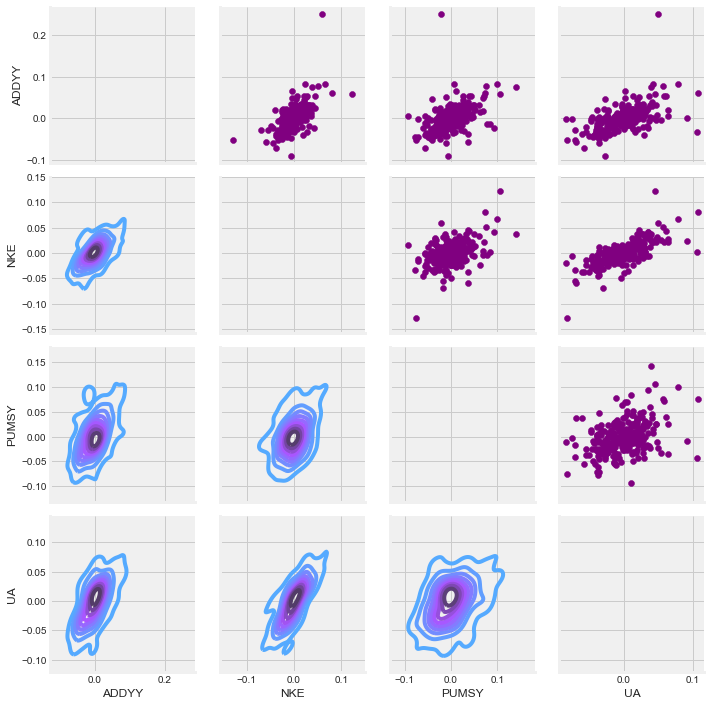

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

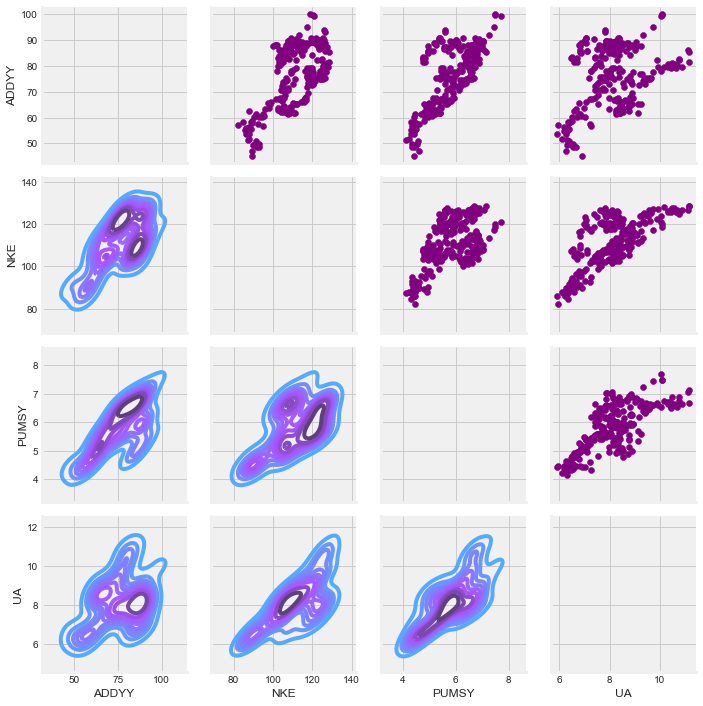

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Por último, también podríamos hacer un gráfico de correlación, para obtener valores numéricos reales de la correlación entre los valores de rentabilidad diaria de las acciones. Comparando los precios de cierre, vemos una relación interesante entre Adidas y Nike.

Text(0.5, 1.0, 'Correlation of stock closing price')

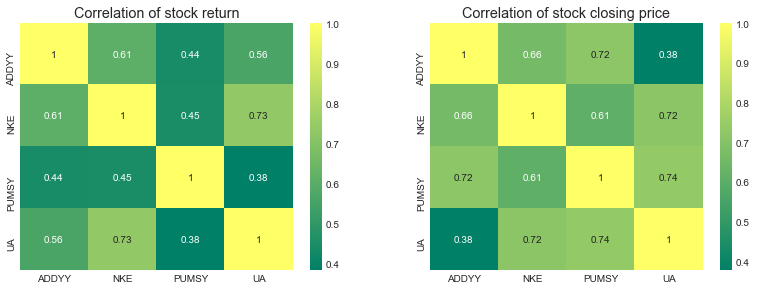

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Tal y como sospechábamos en nuestro PairPlot, aquí vemos numérica y visualmente que Nike y Adidas presentan la mayor correlación de rentabilidad bursátil diaria. También es interesante ver que todas las empresas tecnológicas están correlacionadas positivamente.

# 5. ¿Cuánto valor ponemos en riesgo al invertir en una acción concreta?
Hay muchas formas de cuantificar el riesgo, una de las más básicas utilizando la información que hemos recopilado sobre los rendimientos porcentuales diarios es comparando el rendimiento esperado con la desviación típica de los rendimientos diarios. 

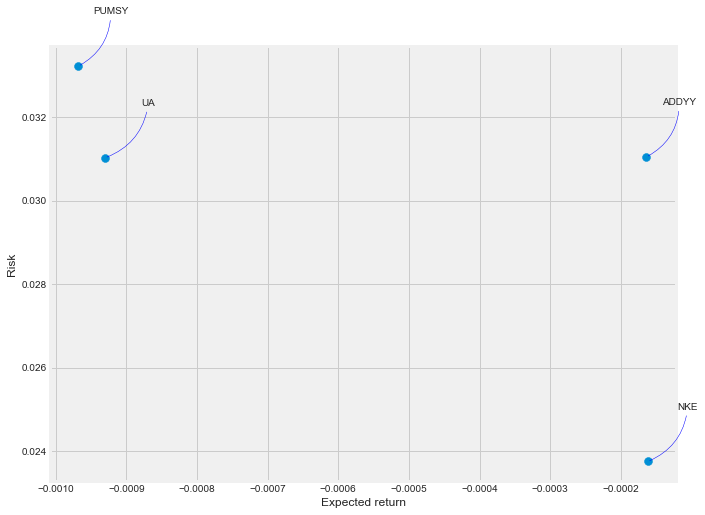

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of NIKE inc:

En resumen, este código carga los datos históricos de cotización de acciones de Nike, los escala, crea conjuntos de entrenamiento y prueba, construye y entrena un modelo de redes neuronales LSTM para predecir el precio de cierre de las acciones de Nike.

In [17]:
# Get the stock quote
df = pdr.get_data_yahoo('NKE', start='2012-01-01', end=datetime.now())
# Show teh data
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,24.342501,24.497499,24.174999,24.202499,21.216761,10944400
2012-01-04,24.177500,24.687500,24.127501,24.555000,21.525774,9440800
2012-01-05,24.447500,24.645000,24.250000,24.540001,21.512632,8393200
2012-01-06,24.482500,24.625000,24.379999,24.497499,21.475367,7760800
2012-01-09,24.525000,24.732500,24.424999,24.587500,21.554264,10045600
...,...,...,...,...,...,...
2023-05-31,105.699997,106.169998,104.830002,105.260002,104.914658,21465200
2023-06-01,104.180000,104.599998,102.900002,103.629997,103.290001,12025200
2023-06-02,107.629997,108.419998,106.129997,107.779999,107.779999,11835000


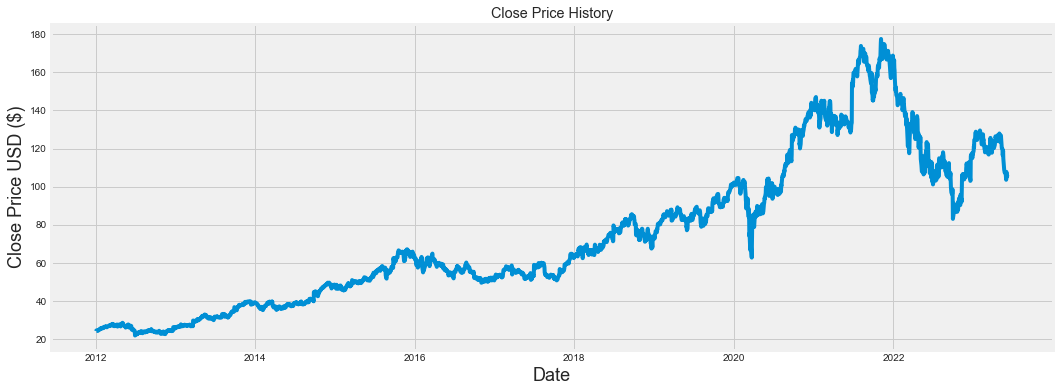

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2732

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01451162],
       [0.01677756],
       [0.01668114],
       ...,
       [0.55176294],
       [0.53517822],
       [0.54208855]])

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01451162, 0.01677756, 0.01668114, 0.01640793, 0.01698647,
       0.01717932, 0.01664899, 0.01819175, 0.01690612, 0.01841674,
       0.02102016, 0.02217723, 0.0224665 , 0.02214508, 0.02318966,
       0.02479671, 0.02333431, 0.02302896, 0.02508598, 0.0260502 ,
       0.02566452, 0.02416996, 0.02526275, 0.02519847, 0.0264359 ,
       0.02916788, 0.02889468, 0.02833222, 0.02802687, 0.0302928 ,
       0.03024459, 0.0295375 , 0.03037316, 0.02759297, 0.02884647,
       0.02950535, 0.02974641, 0.03116061, 0.03157844, 0.03236589,
       0.03336226, 0.03368367, 0.03448719, 0.0314338 , 0.0318195 ,
       0.03233376, 0.03567641, 0.03482467, 0.03692991, 0.03619067,
       0.0368817 , 0.03766915, 0.03913155, 0.0385048 , 0.03641565,
       0.03729952, 0.03156237, 0.03337834, 0.03230161, 0.03125704])]
[0.03225339948597891]

[array([0.01451162, 0.01677756, 0.01668114, 0.01640793, 0.01698647,
       0.01717932, 0.01664899, 0.01819175, 0.01690612, 0.01841674,
       0.02102016, 0.02217723, 0.02

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2672/2672 [==============================] - 81s 29ms/step - loss: 0.0012


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
y_pred = model.predict(x_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

17/17 [==============================] - 0s 27ms/step
Mean Squared Error (MSE): 0.0004921344677062991
Mean Absolute Error (MAE): 0.01986326976939093


# Conclusión
En general, según los valores MSE y MAE proporcionados, parece que su modelo funciona bien y genera predicciones que se aproximan bastante a los valores reales. Sin embargo, es importante interpretar estas métricas en el contexto de su problema y sus datos específicos. Además, siempre es beneficioso comparar estas métricas con modelos alternativos o con el rendimiento de referencia para obtener más información sobre la eficacia del modelo.